# Exam 15th of August 2023, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [1]:
import numpy as np

# Insert your anonymous exam ID as a string in the variable below
examID = "XXX"


In [4]:
import Utils
import numpy as np

---
## Exam vB, PROBLEM 1
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside, however there is always the possibility the truck breaks down and it goes to the workshop. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside | Probability of transitioning to the Workshop |
|-|-|-|-|-|
| Downtown       | 0.3 | 0.7 | 0 | 0 |
| Suburbs        | 0.2 | 0.5 | 0.3 | 0 |
| Countryside    | 0 | 0 | 0.5 | 0.5 |
| Workshop    | 0 | 0 | 0 | 1 |

1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? [2p]
2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region **the first time** after three time steps or more? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? Furthermore it it reversible? (Explain your answer) [3p]
5. Advanced question: What is the expected number of steps it takes starting from the Downtown region to first reach the Workshop? Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 50. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].



In [6]:
# Part 1
# noinspection PyTypeChecker
P = np.matrix(data=[
    [.3, .7, 0, 0],
    [.2, .5, .3, 0],
    [0, 0, .5, .5],
    [0, 0, 0, 1],
])
v_0 = np.array([1,0,0,0])
print(np.matmul(v_0, P**10))
# Fill in the answer to part 1 below
problem1_p1 = 0.08487353

[[0.03393523 0.08268291 0.08487353 0.79850833]]


In [31]:
# Part 2
def do_step(position):
    # noinspection PyTypeChecker
    P = [
        [.3, .7, 0, 0],
        [.2, .5, .3, 0],
        [0, 0, .5, .5],
        [0, 0, 0, 1],
    ]
    current = P[position]
    return np.random.choice([0,1,2,3], p=current)
is_country_side_after_three = []
for i in range(100000):
    pos = 0
    steps = 0
    while pos != 2:
        pos = do_step(pos)
        steps += 1
        if steps > 100: break
    if steps >= 3 and pos == 2:
        is_country_side_after_three.append(1)
    else: is_country_side_after_three.append(0)
print(np.mean(is_country_side_after_three))
# Fill in the answer to part 2 below
problem1_p2 = XXX

0.79069


NameError: name 'XXX' is not defined


## Part 3

Double click this cell to enter edit mode and write your answer for part 3 below this line.


In [ ]:
# Part 3

# Fill in the answer to part 3 below as a boolean
problem1_irreducible = False

In [53]:
# Part 4
P_stationary = np.linalg.matrix_power(P,10001)
print(P_stationary * P)
for i in range(len(P_stationary)):
    for j in range(len(P_stationary)):
        first = P_stationary[i] * P[i,j]
        second = P_stationary[j] * P[j,i]
        print('------')
        print(first)
        print(second)
        
# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
problem1_stationary = P_stationary
problem1_reversible = False

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
------
[[0.  0.  0.  0.3]]
[[0.  0.  0.  0.3]]
------
[[0.  0.  0.  0.7]]
[[0.  0.  0.  0.2]]
------
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
------
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
------
[[0.  0.  0.  0.2]]
[[0.  0.  0.  0.7]]
------
[[0.  0.  0.  0.5]]
[[0.  0.  0.  0.5]]
------
[[0.  0.  0.  0.3]]
[[0. 0. 0. 0.]]
------
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
------
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
------
[[0. 0. 0. 0.]]
[[0.  0.  0.  0.3]]
------
[[0.  0.  0.  0.5]]
[[0.  0.  0.  0.5]]
------
[[0.  0.  0.  0.5]]
[[0. 0. 0. 0.]]
------
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
------
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
------
[[0. 0. 0. 0.]]
[[0.  0.  0.  0.5]]
------
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]


ZeroDivisionError: division by zero

# Part 4

Double click this cell and write your motivation below this line
#### not reversible since the pi_i P_ij is not equal to pi_j * P_ji for all ij



| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside | Probability of transitioning to the Workshop |
|-|-|-|-|-|
| Downtown       | 0.3 | 0.7 | 0 | 0 |
| Suburbs        | 0.2 | 0.5 | 0.3 | 0 |
| Countryside    | 0 | 0 | 0.5 | 0.5 |
| Workshop    | 0 | 0 | 0 | 1 |
## Part 5
Advanced question: What is the expected number of steps it takes starting from the Downtown region to first reach the Workshop? Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 50. Motivate your answer in detail 


Double click this cell to enter edit mode and write your answer for part 5 below this line.


In [61]:
# Part 5
import pandas as pd
answer_array = []
for i in range(1000000):
    # print('------')
    pos = 0
    steps = 0
    while pos != 3:
        steps += 1
        pos = do_step(pos)
        # print(f'pos = {pos} at step {steps}')
    answer_array.append({'steps_to_ws': steps, 'pos': pos})
print(pd.DataFrame(answer_array).describe())
# Fill in the answer to part 5 below
# That is, the expected number of steps
problem1_ET = 7.71

          steps_to_ws        pos
count  1000000.000000  1000000.0
mean         7.710857        3.0
std          4.398735        0.0
min          3.000000        3.0
25%          5.000000        3.0
50%          7.000000        3.0
75%         10.000000        3.0
max         64.000000        3.0


---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given a "Data Science Salaries" dataset found in `data/salaries.csv`, which contains employment information of data scientists up to 2023 and the salary obtained. Your task is to train a `linear regression` model to predict the salary of a data scientist based on the employment information.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

`Experience level`: 0 = Entry Level, 1 = Mid Level, 2 = Senior Level, 3 = Executive Level.

`Employment type`: 0 = Part Time, 1 = Full Time, 2 = Contractor, 3 = Freelancer

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [1p]
2. Split the data into train and test. [1p]
3. Train the model. [1p]
4. Come up with a reasonable metric and compute it. Provide plots that show the performance of the model. Reason about the performance. [4p]
5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio. Then, looking at the output of `problem2_model.coef_`, which are the coefficients of the linear model, would a higher remote ratio result in a higher predicted salary or vice versa? [3p]
6. Advanced question: On the test set, plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). What does the confidence band tell us? What can the confidence band be used for? [3p]


In [106]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
data = pd.read_csv('./data/salaries.csv')
problem2_df = data.copy()
problem2_df.describe()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,1.645539,1.003462,137570.389880,46.271638
std,0.691448,0.678306,0.133550,63055.625278,48.589050
min,2020.000000,0.000000,0.000000,5132.000000,0.000000
25%,2022.000000,1.000000,1.000000,95000.000000,0.000000
50%,2022.000000,2.000000,1.000000,135000.000000,0.000000
75%,2023.000000,2.000000,1.000000,175000.000000,100.000000
max,2023.000000,3.000000,3.000000,450000.000000,100.000000


In [88]:
# Part 1
print(data.columns)
# Fill in the features as a list of strings of the names of the columns

problem2_features = data.drop('salary_in_usd', axis=1).columns

# Fill in the target as a string with the correct column name

problem2_target = 'salary_in_usd'

Index(['work_year', 'experience_level', 'employment_type', 'salary_in_usd',
       'remote_ratio'],
      dtype='object')


In [89]:
# Part 2
#Split the data into train and test. [1p]
from sklearn.model_selection import train_test_split
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem2_X_train, problem2_X_test, problem2_y_train, problem2_y_test = train_test_split(
    data[problem2_features], data[problem2_target],
    train_size=.2, random_state=42
)

In [90]:
# Part 3
from sklearn.linear_model import LinearRegression
# Include the necessary imports

# Initialize your linear regression model
problem2_model = LinearRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)

LinearRegression()

## Part 4

Double click this cell to enter edit mode and write your answer for part 4 below this line.


MAE = 43356.595457346746
R2 = 0.194165621751771


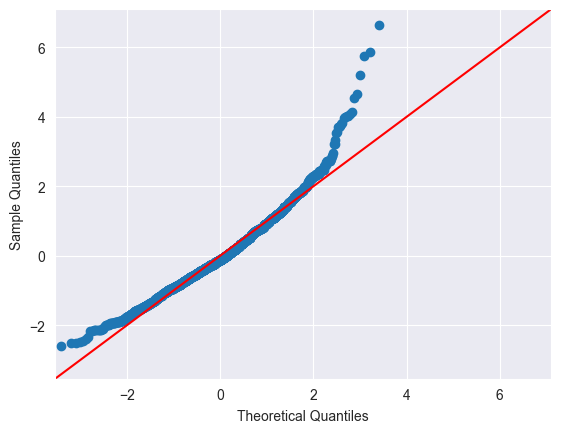

In [91]:
# Part 4
# 4. Come up with a reasonable metric and compute it. Provide plots that show the performance of the model. Reason about the performance. [4p]
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
from statsmodels.api import qqplot
import matplotlib.pyplot as plt

predictions = problem2_model.predict(problem2_X_test)
print(f'MAE = {mean_absolute_error(problem2_y_test, predictions)}')
print(f'R2 = {r2_score(problem2_y_test, predictions)}')
fig = qqplot(np.array(problem2_y_test - predictions),fit=True, line="45")
plt.show(fig)

#### Write the code to diagnose your model
##### peformance is decent but not by any means good. With an R sqaured score of about 20% we can only explain 20 percent of the variance seen in salary. This is also reflected in the MAE being around 43 thousand dollars. That means that the expected distance of our prediction to it's true value is off by 43000 on average. It seems the errors are hetergenously distributed too and the error around our predictions higher for higher incomes. The models performance could be improved with a non-linear model and better features (that account for more variance in the dependent variable).

## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.


In [105]:
# Part 5
# Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio. Then, looking at the output of `problem2_model.coef_`, which are the coefficients of the linear model, would a higher remote ratio result in a higher predicted salary or vice versa??
# Put the code for part 5 below this line
print(f'pred sal = {problem2_model.predict([[2023, 1, 1, 0]])}')
print(list(zip(problem2_model.feature_names_in_,problem2_model.coef_)))
print(f'B_0 = {problem2_model.intercept_}')

pred sal = [118602.24928459]
[('work_year', 15545.888467218509), ('experience_level', 40239.000947358196), ('employment_type', 15390.201371064959), ('remote_ratio', 29.874745945484353)]
B_0 = -31386359.32221688


/Users/finnvaughankraska/IdeaProjects/data_science/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Part 5
# more remote is associated with higher salary (coef is positive)
problem2_predicted_salary = 118602.24928459


## Part 6

Double click this cell to enter edit mode and write your answer for part 6 below this line.



In [ ]:
# Part 6

# Put the code for part 6 below this line
Utils.plotEDF(Utils.makeEDF(problem2_y_test-predictions), confidence_band=True)

---
## Exam vB, PROBLEM 3
Maximum Points = 13


## Random variable generation

1. [4p] Using inversion sampling, construct 1000 samples from the below distribution
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        e^x-1, & 0 < x < \ln(2) \\
        1, & x \geq \ln(2)
    \end{cases}
$$
2. [2p] Use the above 1000 samples to estimate the mean and variance
3. [4p] Using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) construct 1000 samples from the same distribution, what proposal distribution did you choose and why? What proportion of samples where accepted?
4. [3p] Explain if it is possible to sample from the density
$$
    f(x) = C e^{-(x^2-2)^2}
$$
using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) with sampling density given the Gaussian. Here $C$ is a constant to make sure that $f$ is a density, it between roughly $1.34$ and $1.35$.

In [147]:
# Part 1

def f_of_x(x): #this is a CDF
    if x <= 0:
        return 0
    elif x < np.log(2):
        return np.exp(x) - 1
    else: return 1;

def df_of_x(x): #ie the pdf
    if x <= 0:
        return 0
    elif x < np.log(2):
        return np.exp(x)
    else: return 0;

def f_inverse_of_x(x):
    if x < 0: return 0;
    if x > 1: return 0;
    return np.log(x+1)


<Axes: ylabel='Density'>

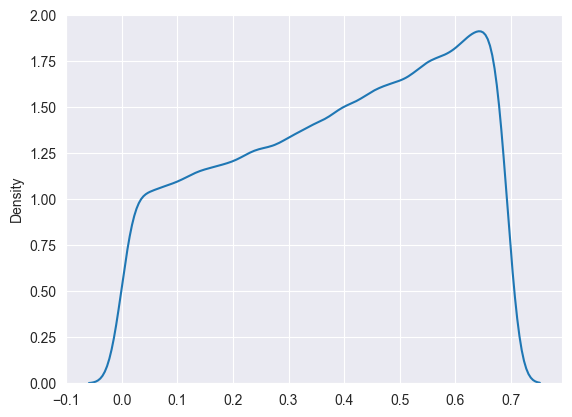

In [152]:
# Part 1

# Put the resulting samples into the following variable
problem3_samples = [f_inverse_of_x(x) for x in np.random.uniform(size=100000)]
sns.kdeplot(problem3_samples)
# sns.lineplot(x=np.arange(-1,1.5,.01),y=[df_of_x(x) for x in np.arange(-1,1.5,.01)])

In [149]:
# Part 2

problem3_mean = np.mean(problem3_samples)

problem3_variance = np.var(problem3_samples)

Attempted total = 200034, rate = 0.5


<Axes: ylabel='Density'>

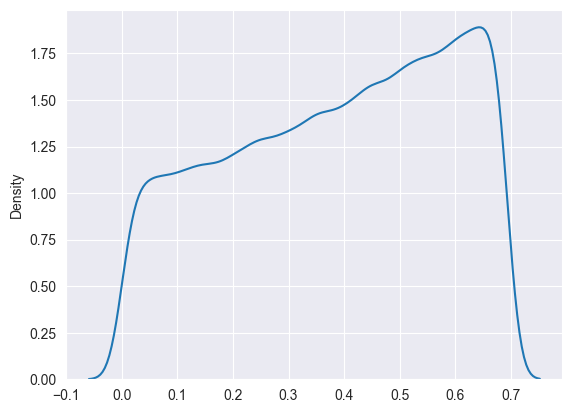

In [153]:
# Part 3


# Write your code below
samples = []
attempts = 0
while len(samples) < 100000:
    attempts += 1
    random_x = np.random.uniform()
    random_y = 2 * np.random.uniform()
    # print('---')
    # print(f'({random_x}, {random_y}), f(x)={f_of_x(random_x)}')
    if random_y <= df_of_x(random_x):
        samples.append(random_x)
print(f'Attempted total = {attempts}, rate = {np.round(len(samples)/attempts, decimals=3)}')
sns.kdeplot(samples)

In [ ]:
# Part 3

# Write your answer in this cell below

problem3_samples_accept_reject = .5

# Put your answer for the proportion of samples accepted below

problem3_acceptance_rate = .5

# Part 3

### Double click this cell and write you answer for part 3 below, explain what proposal distibution you chose and why you can choose it.
#### Chose the uniform dist since since I know i can capture the dist of interest with certainty by raising the range of the uniform such that it ecapsulates all of the PDF. ALso just easy to work with since the distribution we want samples from is bounded (no tails to worry about).

# Part 4

### Double click this cell and write you answer for part 4 below, explain if the Gaussian works as a proposal distribution for this density.
#### -should work if we scale the gaussian up and out enough such that the tails are an upper bound of the f(x) function. Something to note though, the value of C suggested above does not actually make f(x) a valid density function. The valid domain is -inf to +inf and the integral on that period evaluates to way more than one. Are we meant to assume a restricted domain of x? Or is this just a mistake in calculation?


Attempted total = 275363, rate = 0.036


<Axes: ylabel='Count'>

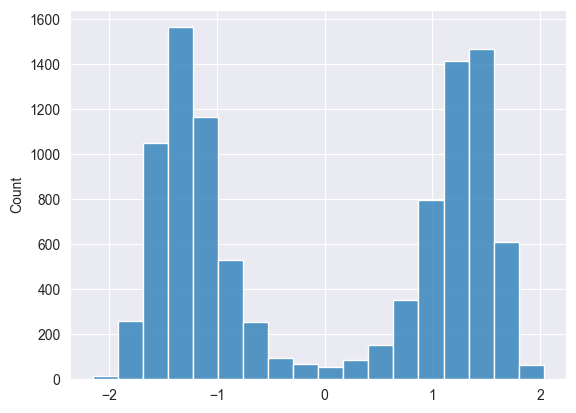

In [177]:
C = .746
def other_function(x):
    return C * np.exp(-(x**2-2)**2)
samples_0 = []
attempts_0 = 0
while len(samples_0) < 10000:
    attempts_0 += 1
    random_x = np.random.normal(0, 1.2)
    random_y = 5 * np.random.uniform()
    # print('---')
    # print(f'({random_x}, {random_y}), f(x)={f_of_x(random_x)}')
    if random_y <= other_function(random_x):
        samples_0.append(random_x)
print(f'Attempted total = {attempts_0}, rate = {np.round(len(samples_0)/attempts_0, decimals=3)}')
sns.histplot(samples_0)